In [93]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [94]:
import essentia
from essentia.standard import MonoLoader
import IPython

nmics = 8

fs = 16000.0
loader = MonoLoader(filename='SI1644.WAV', sampleRate=fs)
voice = loader().astype(np.float64)
IPython.display.Audio(voice, rate=16000.0)
voice_micarr = np.matmul(np.ones(nmics)[:, np.newaxis], voice[np.newaxis, :])
print voice_micarr.shape
voice_len = voice.shape[0]

(8, 30720)


In [95]:
# Apply random amounts of delay
# simulates: distance from source

maxdelay = 20

for i in xrange(nmics):
    d = np.random.randint(maxdelay)
    delay = np.zeros(d, dtype=np.float64)
    voice_delayed = np.concatenate([delay, voice_micarr[i]])[:voice_len]
    voice_micarr[i] = voice_delayed

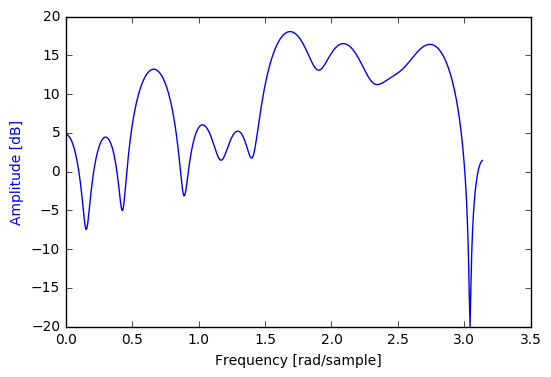

In [96]:
from scipy.signal import freqz, filtfilt

lenfilt = 20

filters = np.random.standard_normal((nmics, lenfilt))
f = filters[4]
w, h = freqz(f)
plt.plot(w, 20 * np.log10(abs(h)))
plt.ylabel('Amplitude [dB]', color='b')
_ = plt.xlabel('Frequency [rad/sample]')

In [97]:
# Apply FIR filter with random taps
# simulates: crappy mic response and room acoustics

for i, f in enumerate(filters):
    voice_filtered = filtfilt(f, [1.], voice_micarr[i])
    voice_micarr[i] = voice_filtered

In [102]:
for response in voice_micarr:
    IPython.display.Audio(response, rate=16000.0)